In [1]:
%matplotlib inline
from datetime import datetime
import pandas as pd
import math
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import numpy as np
from dateutil.relativedelta import relativedelta
from IPython.display import display, Markdown

## COVID Cases by specimen date

In [2]:
# Read covid new cases data
cases_df = pd.read_csv("data/data_2022-Aug-24.csv")
cases_df = cases_df[["date", "newCasesBySpecimenDate"]]
cases_df["date"] = pd.to_datetime(cases_df['date'])

In [3]:
# Data starts on 29th Jan with the first UK Covid case; backfill to 1st Jan
def backfill_start(df, column_name):
    start_date = pd.to_datetime("2020-01-01")
    min_date = pd.to_datetime(min(df.date))
    days = (min_date - start_date).days

    fill_df = pd.DataFrame({"date": pd.date_range(start_date, periods=days), column_name: [0] * days})
    new_df = pd.concat([df, fill_df])
    new_df.set_index("date", inplace=True)
    new_df.sort_index(ascending=True, inplace=True)
    return new_df

In [4]:
cases_df = backfill_start(cases_df, "newCasesBySpecimenDate")

In [5]:
# Read significant OS dates (starts with 13th Mar 2020 BMJ blog post)
dates_from_os_timeline = pd.read_csv("data/os_dates.csv")
dates_from_os_timeline["date"] = pd.to_datetime(dates_from_os_timeline['date'])
dates_from_os_timeline.sort_values("date", inplace=True)

## 13 Mar 2020

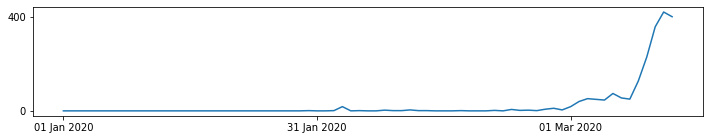

## 17 Mar 2020

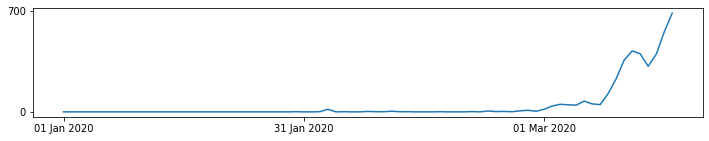

## 18 Mar 2020

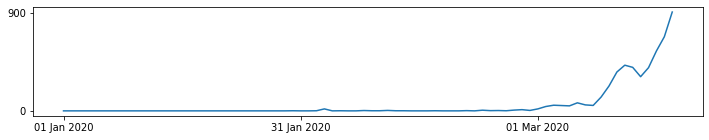

## 20 Mar 2020

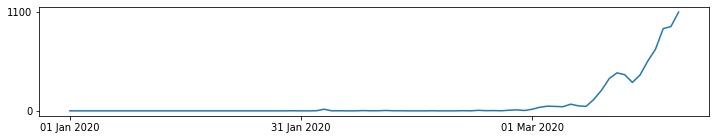

## 30 Mar 2020

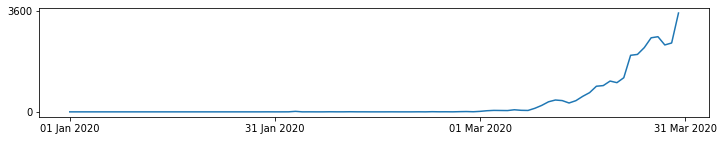

## 14 Apr 2020

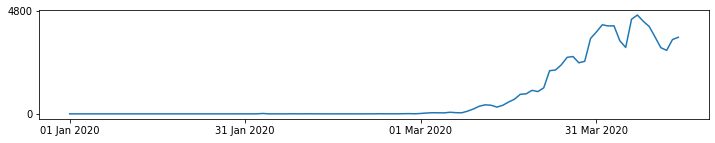

## 07 May 2020

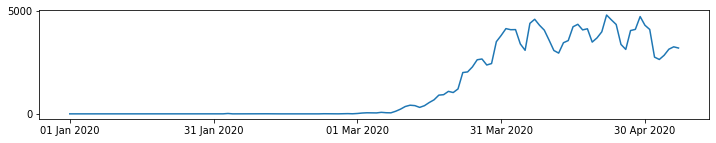

## 15 May 2020

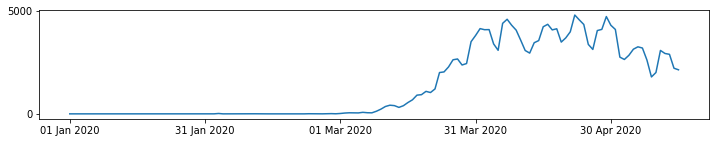

## 16 Jun 2020

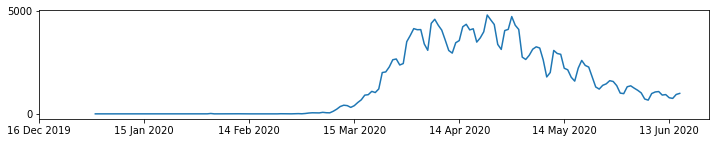

## 29 Jun 2020

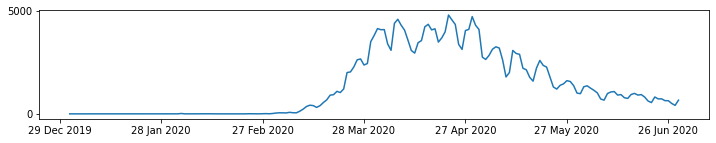

## 08 Jul 2020

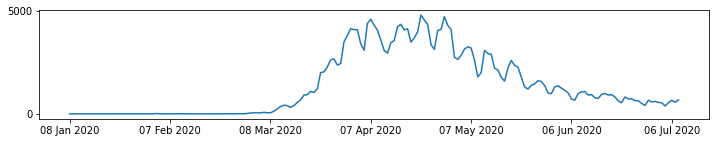

## 29 Jul 2020

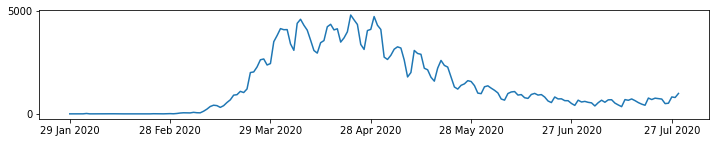

## 20 Nov 2020

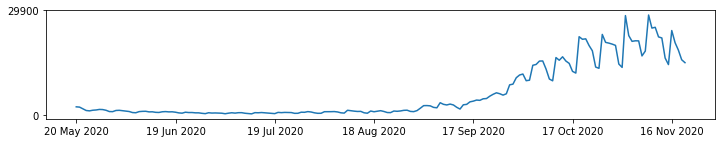

## 21 Jan 2021

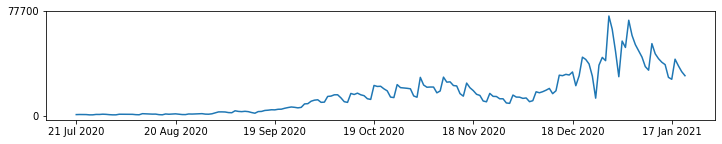

## 19 Feb 2021

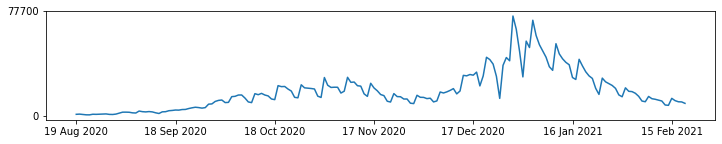

## 25 Mar 2021

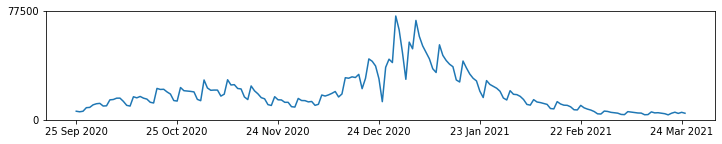

## 09 Apr 2021

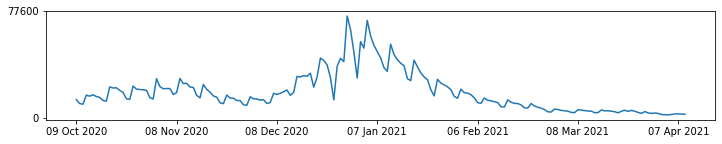

## 07 Jul 2021

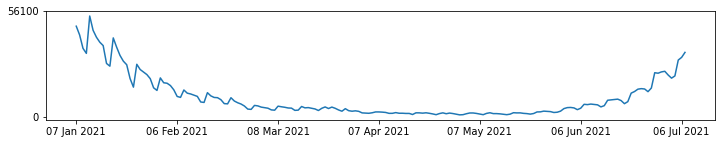

## 02 Feb 2022

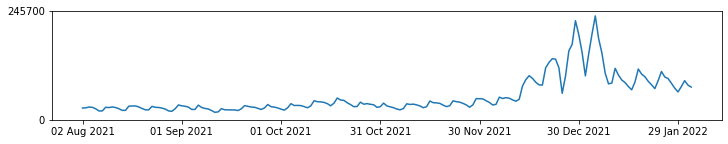

## 07 Feb 2022

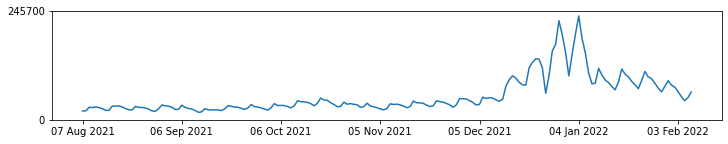

## 05 Apr 2022

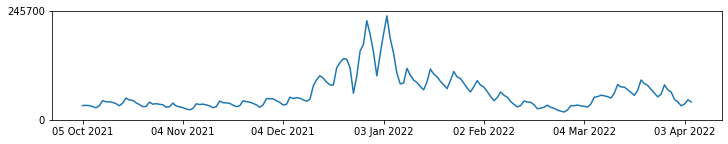

## 07 Apr 2022

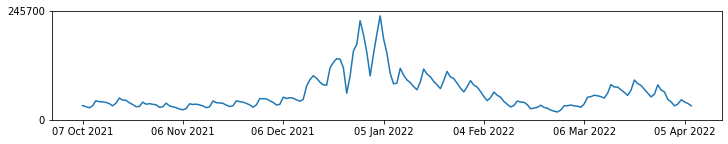

## 21 Apr 2022

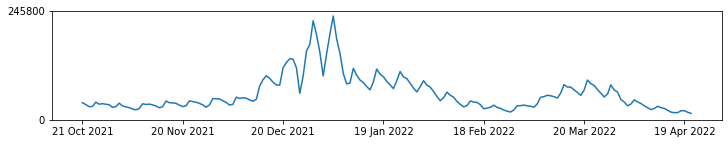

## 18 Sep 2022

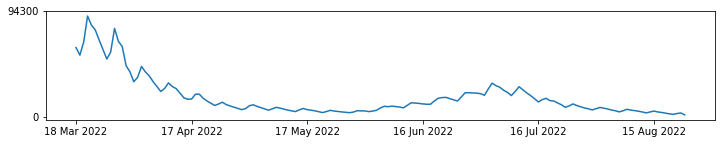

In [6]:
for i, row in dates_from_os_timeline.iterrows():
    if row.event != "os":
        continue
    date = row.date
    # Plot each OS-significant date with the preceding 6 months
    display(Markdown(f"## {date.strftime('%d %b %Y')}"))
    
    datefmt = "%Y-%m-%d"
    end_date = date.strftime(datefmt)
    if date < datetime(2020, 6, 1):
        start_date = "2020-01-01"
    else:
        start_date = date - relativedelta(months=6)
        start_date = start_date.strftime(datefmt)
    fig, ax = plt.subplots()
    df1 = cases_df.loc[start_date: date.strftime(end_date)]
    plt.plot(df1)
    _, endx = ax.get_xlim()
    _, endy = ax.get_ylim()
    start = np.float64(np.datetime64(start_date))
    ax.xaxis.set_ticks(np.arange(start, endx, 30))
    ax.yaxis.set_ticks(np.arange(0, endy, math.floor(endy/100) * 100))
    ax.xaxis.set_major_formatter(DateFormatter('%d %b %Y'))

    fig = plt.gcf()
    fig.set_size_inches(12, 2)

    plt.show()

## COVID deaths within 28 days of positive test by date of death

In [7]:
# Read covid daily death data
deathsdf = pd.read_csv("data/data_deaths-2022-Aug-24.csv")
deathsdf = deathsdf[["date", "newDeaths28DaysByDeathDate"]]
deathsdf["date"] = pd.to_datetime(deathsdf['date'])

In [8]:
deathsdf = backfill_start(deathsdf, "newDeaths28DaysByDeathDate")

In [9]:
# Plot covid DF with OS dates from 01 Jan 2020
def plot_with_os_dates(df, os_dates_df):
    fig, ax = plt.subplots()
    plt.plot(df)
    _, endx = ax.get_xlim()
    _, endy = ax.get_ylim()
    ax.xaxis.set_major_formatter(DateFormatter('%d %b %Y'))

    # Add vertical lines for OS-significant dates (red) and Covid-19 dates - lockdowns, vaccination start etc (green)
    event_colours = {"os": "r", "c19": "g"}
    for i, row in os_dates_df.iterrows():
        np_date = np.float64(np.datetime64(row.date.date()))
        plt.axvline(np_date, color=event_colours[row.event], linestyle='--')

    fig = plt.gcf()
    fig.set_size_inches(17, 2)

    plt.show()

### COVID deaths (with OS dates)

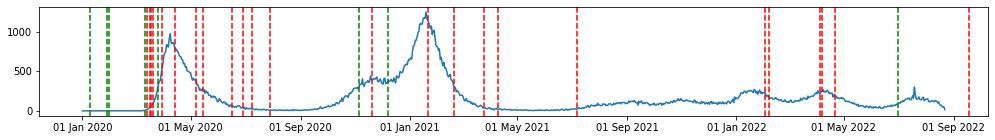

In [10]:
plot_with_os_dates(deathsdf, dates_from_os_timeline)

### COVID cases (with OS dates)

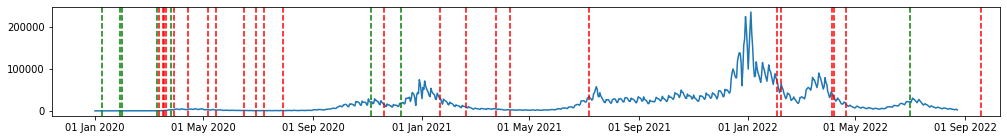

In [11]:
plot_with_os_dates(cases_df, dates_from_os_timeline)